# 1

   year  month  day  week  temp_2  temp_1  average  actual  forecast_noaa  \
0  2016      1    1   Fri      45      45     45.6      45             43   
1  2016      1    2   Sat      44      45     45.7      44             41   
2  2016      1    3   Sun      45      44     45.8      41             43   
3  2016      1    4   Mon      44      41     45.9      40             44   
4  2016      1    5  Tues      41      40     46.0      44             46   

   forecast_acc  forecast_under  friend  
0            50              44      29  
1            50              44      61  
2            46              47      56  
3            48              46      53  
4            46              46      41  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  


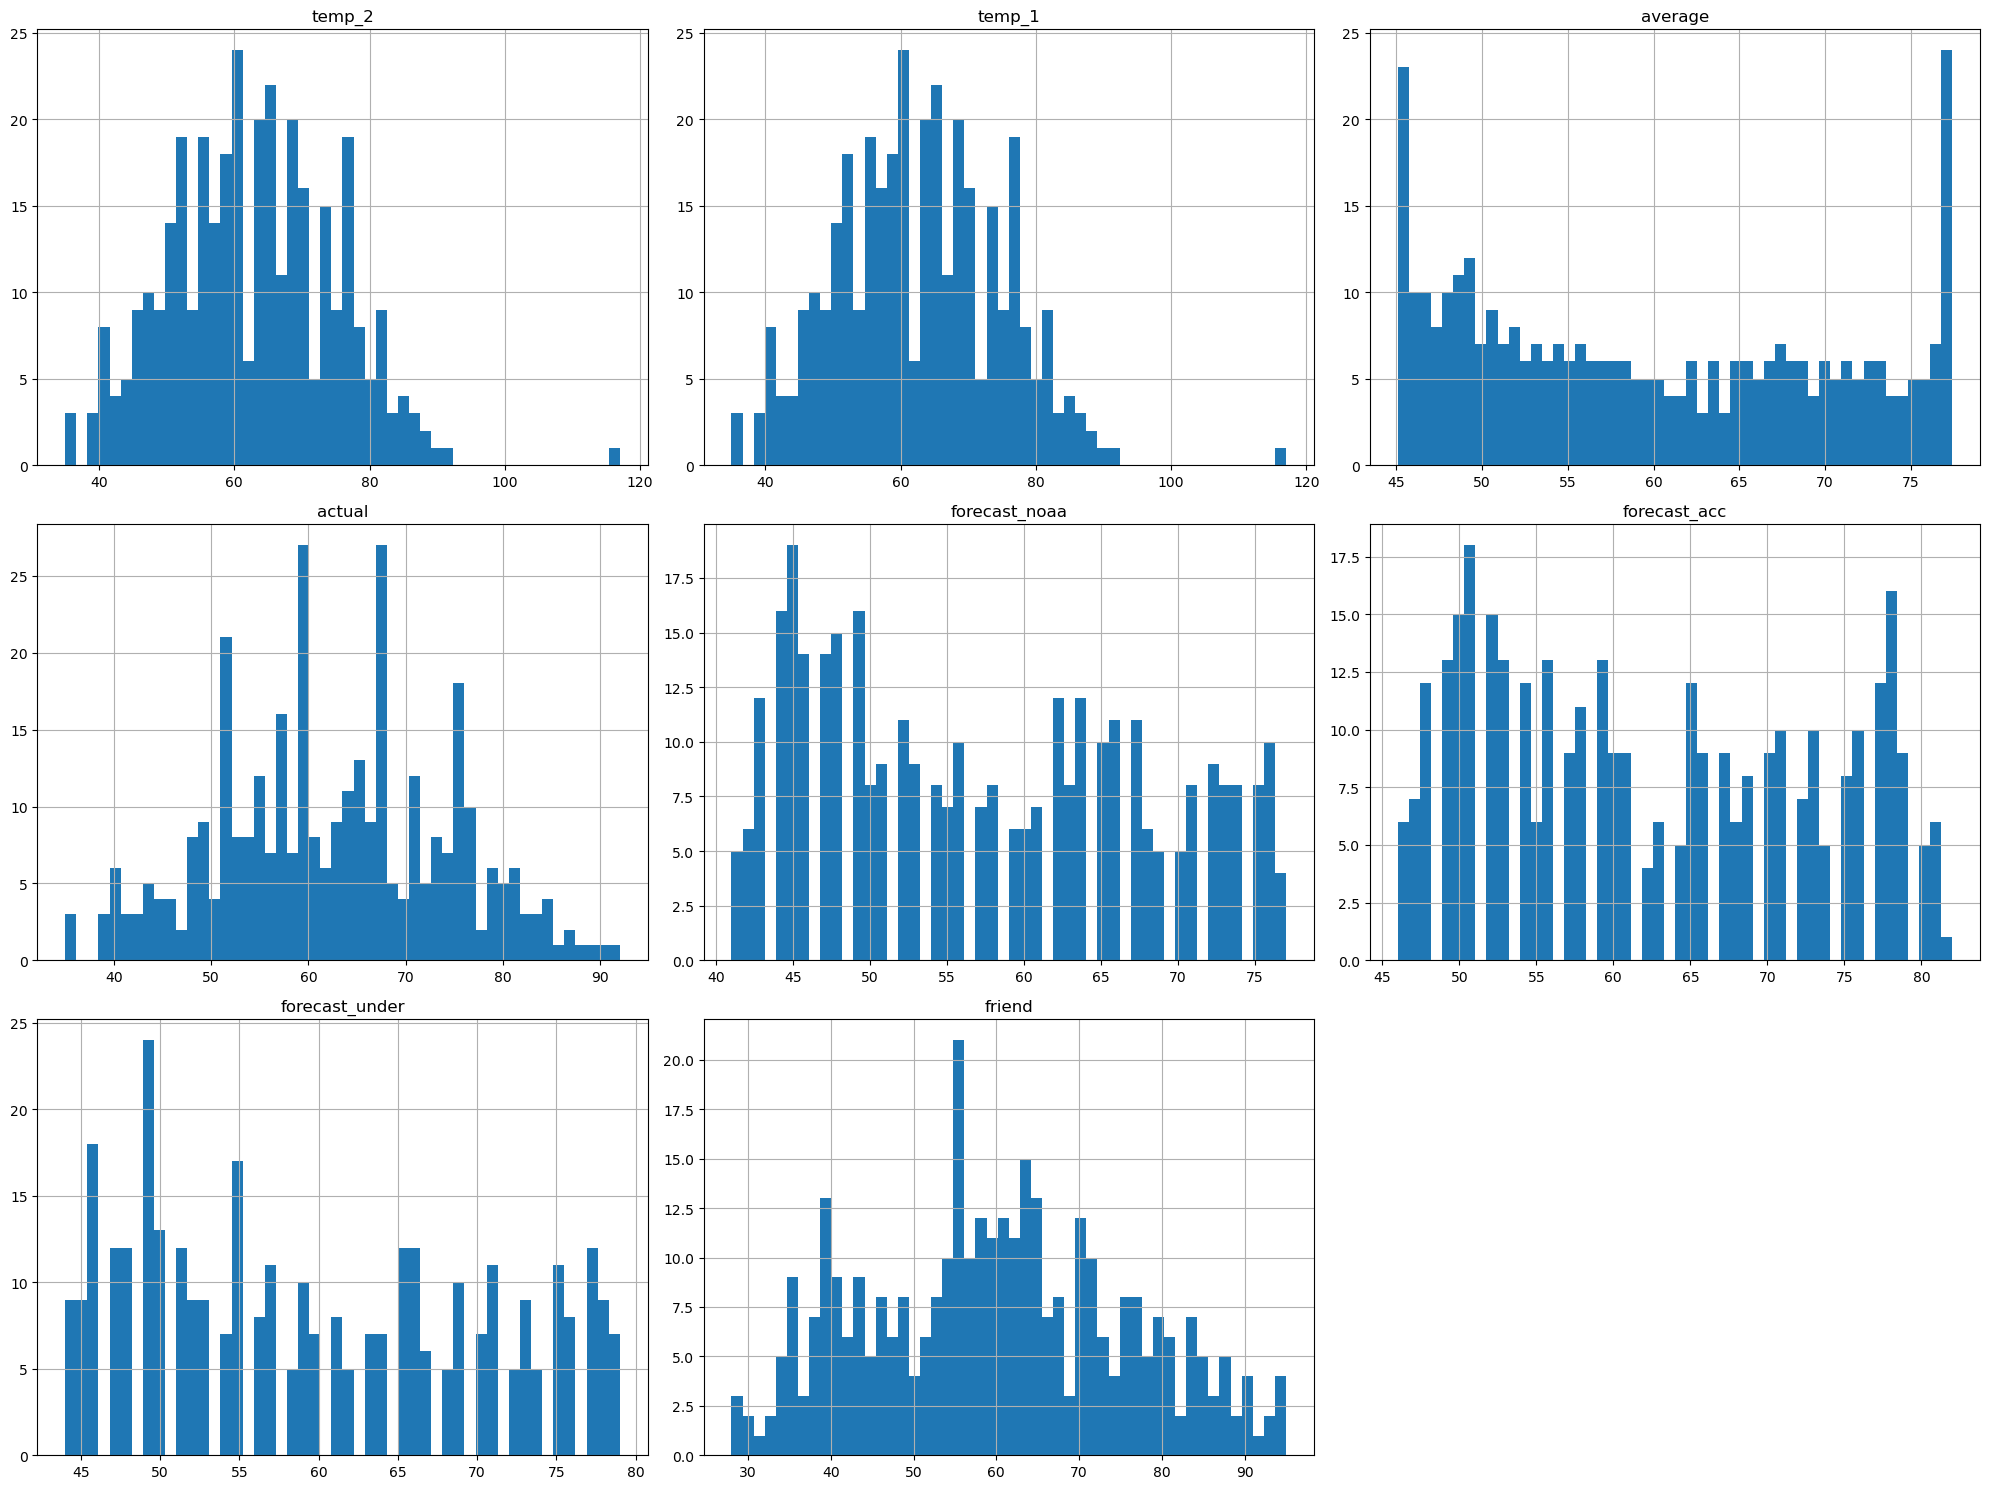

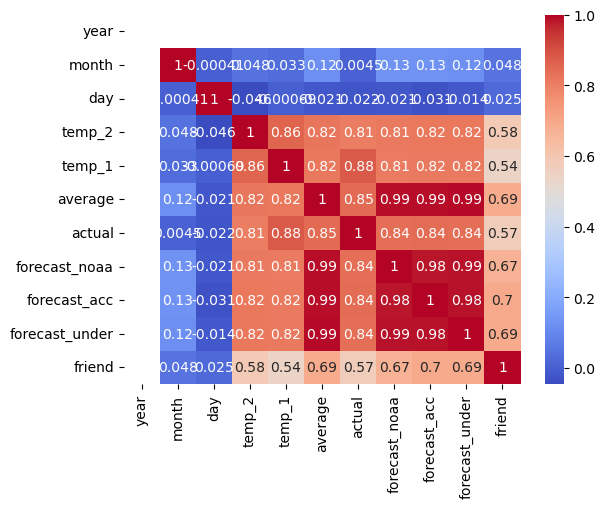

Tues     52
Fri      50
Sat      50
Sun      49
Mon      49
Wed      49
Thurs    49
Name: week, dtype: int64


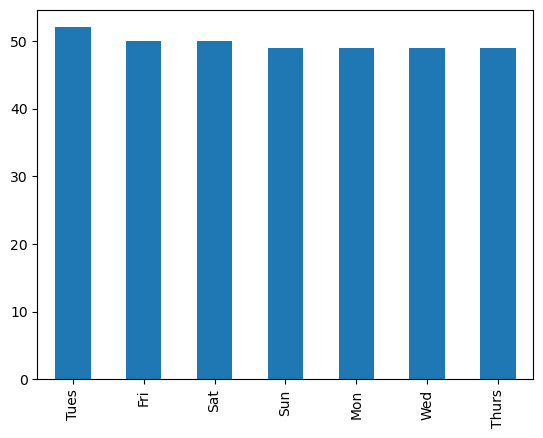

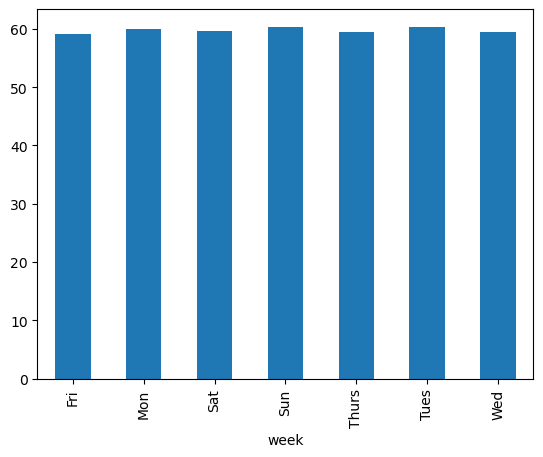

In [2]:
# 먼저 필요한 라이브러리들을 import 합니다. pandas는 데이터 분석, matplotlib와 seaborn은 데이터 시각화에 사용됩니다.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터를 불러옵니다.
df = pd.read_csv('problem1.csv')

# 데이터의 첫 5행을 확인합니다. 이를 통해 데이터의 개략적인 구조와 값들을 확인할 수 있습니다.
print(df.head())

# 데이터의 전체적인 정보를 확인합니다. 이를 통해 각 변수의 데이터 타입과 결측치의 유무를 확인할 수 있습니다.
print(df.info())

# 연속형 변수들의 기술통계를 확인합니다. 이를 통해 각 변수의 중심 경향, 퍼짐 정도 등을 파악할 수 있습니다.
print(df.describe())

#각 연속형 변수들의 분포를 확인합니다. 히스토그램 또는 박스플롯을 이용할 수 있습니다.
df[['temp_2', 'temp_1', 'average', 'actual', 'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend']].hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

# 각 변수들 간의 상관계수를 계산하고, 이를 히트맵으로 시각화합니다. 이를 통해 변수들 간의 관계를 파악할 수 있습니다.
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# 범주형 변수인 'week'의 분포를 확인합니다.
print(df['week'].value_counts())

# 'week' 변수에 대해 바 플롯을 그립니다.
df['week'].value_counts().plot(kind='bar')
plt.show()

# 마지막으로, 각 요일('week')별로 'average' 온도의 평균을 계산하고 이를 바 플롯으로 시각화합니다.
df.groupby('week')['average'].mean().plot(kind='bar')
plt.show()

In [3]:
# 먼저 결측치를 확인하고 처리하는데 필요한 pandas 라이브러리를 import 합니다.
import pandas as pd

# 데이터의 결측치를 확인합니다. 각 컬럼별로 결측치의 개수를 출력할 것입니다.
print(df.isnull().sum())

# 결측치 처리 방법은 주로 결측치를 제거하는 방법과 결측치를 다른 값으로 대체하는 방법이 있습니다[[2](https://m.blog.naver.com/pmw9440/221409195624)].
# 1. 결측치 제거: 결측치가 존재하는 행 또는 열을 데이터셋에서 제거합니다. 이 방법은 데이터의 손실이 발생할 수 있으므로 결측치가 많지 않을 때 사용하는 것이 좋습니다.
# 결측치가 있는 행을 제거합니다.
df.dropna(inplace=True)

#2. 평균값으로 대체: 결측치가 존재하는 변수에서 결측되지 않은 나머지 값들의 평균을 내어 결측치를 대체합니다. 이 방법은 변수의 평균값이 변하지 않는다는 장점이 있지만, 원래의 분산을 변형시킬 수 있고, 원래의 공분산을 변형시킬 수 있다는 단점이 있습니다[[1](https://daebaq27.tistory.com/43), [3](https://cheris8.github.io/data%20analysis/DP-NA-Imputation/)].
# 평균으로 결측치를 대체합니다.
df.fillna(df.mean(), inplace=True)


year              0
month             0
day               0
week              0
temp_2            0
temp_1            0
average           0
actual            0
forecast_noaa     0
forecast_acc      0
forecast_under    0
friend            0
dtype: int64


C:\Users\exqui\AppData\Local\Temp\ipykernel_18052\1397668381.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [4]:
# 필요한 라이브러리 불러오기
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import f_regression

# 4. 범주형 변수 처리
# 'week' 변수를 원-핫 인코딩으로 변환합니다.
encoder = OneHotEncoder()
week_encoded = encoder.fit_transform(df['week'].values.reshape(-1, 1)).toarray()
week_encoded_df = pd.DataFrame(week_encoded, columns=encoder.get_feature_names(['week']))
df = pd.concat([df.drop('week', axis=1), week_encoded_df], axis=1)

# 5. 통계적으로 유의한 feature 선택
# F-test를 사용하여 각 피처가 target 변수에 미치는 영향을 평가합니다.
F, p = f_regression(df.drop('actual', axis=1), df['actual'])
significant_features = df.drop('actual', axis=1).columns[p < 0.05]
print('통계적으로 유의한 feature:', significant_features)

# 6. 데이터를 학습 데이터셋과 테스트 데이터셋으로 분할
X_train, X_test, y_train, y_test = train_test_split(df[significant_features], df['actual'], test_size=0.2, random_state=42)

# 7. 모델 학습 및 예측
# Random Forest 모델
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
print('Random Forest 예측:', rf_predictions)

# SVM 모델
svm = SVR()
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)
print('SVM 예측:', svm_predictions)


C:\Users\exqui\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


통계적으로 유의한 feature: Index(['temp_2', 'temp_1', 'average', 'forecast_noaa', 'forecast_acc',
       'forecast_under', 'friend'],
      dtype='object')
Random Forest 예측: [70.63 62.82 50.7  63.27 66.88 70.26 79.2  75.53 61.68 74.14 65.71 71.53
 38.68 62.07 71.07 56.57 60.44 57.5  57.27 74.82 61.63 54.65 67.16 60.59
 57.55 51.94 65.93 45.69 61.84 79.05 70.64 63.61 53.49 82.85 74.6  60.62
 53.85 51.92 68.76 42.23 71.32 57.4  75.47 42.37 60.93 73.81 53.55 82.56
 53.14 41.29 45.74 40.82 64.97 65.97 74.93 61.12 55.25 60.41 56.28 59.96
 65.89 49.71 62.19 70.18 62.15 60.51 74.52 69.76 76.54 40.89]
SVM 예측: [66.88903769 61.80438502 49.5848929  62.73501638 66.95771172 68.35440557
 75.81838761 73.02785583 59.24111218 68.68338303 60.64282077 68.44202717
 49.0305381  63.753701   70.12535365 53.59899968 61.26088157 57.66538834
 57.12695976 74.26741126 64.86028728 53.6305942  66.61998245 61.32388548
 57.59839815 52.68405667 66.22150536 48.7600144  64.15175193 75.62688677
 66.30658978 63.23145138 53.179028

In [7]:
importances = rf.feature_importances_
forest_importances = pd.Series(importances, index=significant_features)
forest_importances 

temp_2            0.022843
temp_1            0.683440
average           0.150465
forecast_noaa     0.026915
forecast_acc      0.061151
forecast_under    0.026502
friend            0.028685
dtype: float64